In [ ]:
# ==========================================
# Multiple Linear Regression - 4 Features
# California Housing Dataset
# ==========================================

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    "CGPA": [9.0, 8.5, 7.8, 8.0, 9.2, 6.8, 7.5, 8.8, 9.5, 7.0],
    "IQ": [120, 115, 110, 112, 125, 105, 108, 118, 130, 102],
    "InternshipScore": [85, 80, 70, 75, 90, 60, 65, 88, 95, 55],
    "Package": [12, 10, 7, 8, 15, 5, 6, 13, 16, 4]  # in LPA (Lakhs per Annum)
}

df = pd.DataFrame(data)
print(df)

   CGPA   IQ  InternshipScore  Package
0   9.0  120               85       12
1   8.5  115               80       10
2   7.8  110               70        7
3   8.0  112               75        8
4   9.2  125               90       15
5   6.8  105               60        5
6   7.5  108               65        6
7   8.8  118               88       13
8   9.5  130               95       16
9   7.0  102               55        4


In [18]:
df

,CGPA,IQ,InternshipScore,Package
0,9.0,120,85,12
1,8.5,115,80,10
2,7.8,110,70,7
3,8.0,112,75,8
4,9.2,125,90,15
5,6.8,105,60,5
6,7.5,108,65,6
7,8.8,118,88,13
8,9.5,130,95,16
9,7.0,102,55,4


tep 2: Split Features & Target

In [20]:
X = df[["CGPA", "IQ", "InternshipScore"]]  # Features
y = df["Package"]  # Target

Step 3: Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Step 4: Build Pipeline & Train Model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

# Save model
joblib.dump(pipeline, "cgpa_iq_package_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [23]:
# Example test data
new_student = np.array([[8.5, 118, 82]])  # CGPA, IQ, InternshipScore

loaded_model = joblib.load("cgpa_iq_package_model.pkl")
predicted_package = loaded_model.predict(new_student)

print(f"Predicted Package: {predicted_package[0]:.2f} LPA")

Predicted Package: 11.50 LPA


c:\Users\anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Key Notes

Features:

CGPA → Academic performance

IQ → Intelligence score

InternshipScore → Internship evaluation

Target: Package in LPA (Lakhs per Annum)

Pipeline uses StandardScaler → scales features for better regression stability.

Model saved with joblib → ready for deployment in Streamlit or Flask.

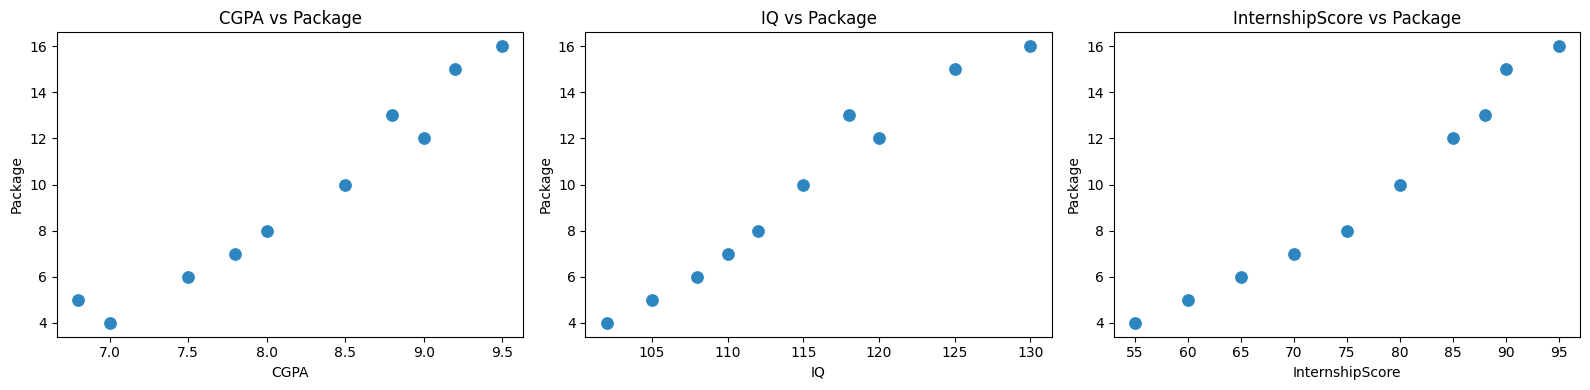

In [27]:
# ------------------------------------------
# 7. Feature vs Package Scatter Plots
import matplotlib.pyplot as plt
import seaborn as sns
# ------------------------------------------

features = ["CGPA", "IQ", "InternshipScore"]

plt.figure(figsize=(16,4))

for i, feature in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x=df[feature], y=df["Package"], s=100, color="#2E86C1")
    plt.xlabel(feature)
    plt.ylabel("Package")
    plt.title(f"{feature} vs Package")
    
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (2,) and (4128,)

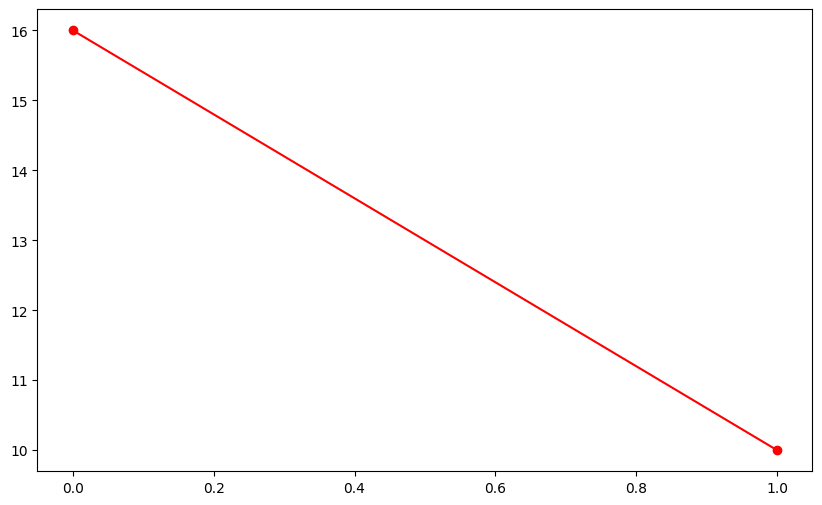